In [87]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.vector_ar.vecm import *
from random import random
from pmdarima.arima import auto_arima

ModuleNotFoundError: No module named 'statsmodels.api.tsa'; 'statsmodels.api' is not a package

In [2]:
Y = pd.read_csv('Dataset/industry_demand_child_q.csv', parse_dates=['Time'])
X = pd.read_csv('Dataset/cleaned_predictors.csv', parse_dates=['Time'])

In [4]:
Y.head()

,Time,"Food, Beverages & Tobacco",Paper/Rubber/Plastic Products & Printing,"Petroleum, Chemical & Pharmaceutical Products","Fabricated Metal Products, Machinery & Equipment","Electronic, Computer & Optical Products",Transport Equipment,Other Manufacturing Industries,Construction,Wholesale Trade,...,Architectural & Engineering Services,Other Professional Services,Security & Investigation,Cleaning & Landscaping,Other Administrative & Support Services,Public Administration & Education,Health & Social Services,"Arts, Entertainment & Recreation","Other Community, Social & Personal Services",Others
0,2006-04-01,300,500,400,2400,3000,2000,700,2200,1600,...,600,400,800,400,600,4100,1200,500,300,500
1,2006-07-01,300,500,300,2200,2800,1800,600,1400,1900,...,500,300,1100,600,500,4300,1200,600,400,300
2,2006-10-01,400,500,300,2800,2100,1500,400,1900,2300,...,700,400,1100,400,500,3900,1300,600,600,200
3,2007-01-01,300,600,400,2700,2400,1900,700,1800,2400,...,700,400,1200,500,500,4400,1500,600,600,200
4,2007-04-01,400,500,500,2000,2000,2200,800,2400,2800,...,1000,700,1500,200,300,5500,1600,700,600,600


In [53]:
modelDict = {}
TEST_SIZE = 15

for col in Y.columns:
    if col == 'Time':
        continue
        
    print(f"Fitting Auto Arima to {col}")
    tempY = Y[col]

    train, test = tempY.iloc[:-TEST_SIZE], tempY.iloc[-TEST_SIZE:]

    model = auto_arima(train, start_p=1, start_q=1,
                          test='adf',
                          max_p=10, max_q=10,    
                          seasonal=True,   
                          D=None, 
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True, 
                          stepwise=True)
    
    modelDict[col] = model
    print('----------------------------------------------------------')
    print()

Fitting Auto Arima to Food, Beverages & Tobacco
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=668.330, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=683.751, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=677.630, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=666.830, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=681.789, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=668.239, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=669.121, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=665.971, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=667.736, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=667.643, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=675.801, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=669.920, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.290 seconds
----------------------------------------------------

 ARIMA(3,2,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.06 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=667.239, Time=0.05 sec

Best model:  ARIMA(3,2,0)(0,0,0)[0]          
Total fit time: 0.286 seconds
----------------------------------------------------------

Fitting Auto Arima to Water Transport & Supporting Services
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=710.583, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=716.105, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=711.843, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=708.652, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=714.161, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=710.549, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=712.423, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=707.074, Time=0

 ARIMA(0,1,0)(0,0,0)[0]             : AIC=593.254, Time=0.00 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.082 seconds
----------------------------------------------------------

Fitting Auto Arima to Real Estate Services
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=737.196, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=745.909, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=740.591, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=735.225, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=743.969, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=737.118, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=735.984, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=733.459, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=735.444, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=735.357, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=738.719, Time=0.01 s

 ARIMA(4,2,0)(0,0,0)[0]             : AIC=688.247, Time=0.04 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=689.542, Time=0.04 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(3,2,1)(0,0,0)[0]             : AIC=687.007, Time=0.05 sec
 ARIMA(2,2,1)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(3,2,2)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(4,2,2)(0,0,0)[0]             : AIC=inf, Time=0.10 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=688.926, Time=0.08 sec

Best model:  ARIMA(3,2,1)(0,0,0)[0]          
Total fit time: 0.663 seconds
----------------------------------------------------------

Fitting Auto Arima to Other Community, Social & Personal Services
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=748.311, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=762.252, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=751.994, Time=0.0

C:\Users\fiat\AppData\Local\Temp\ipykernel_17352\427733193.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(1, 1, figsize=(15, 5))


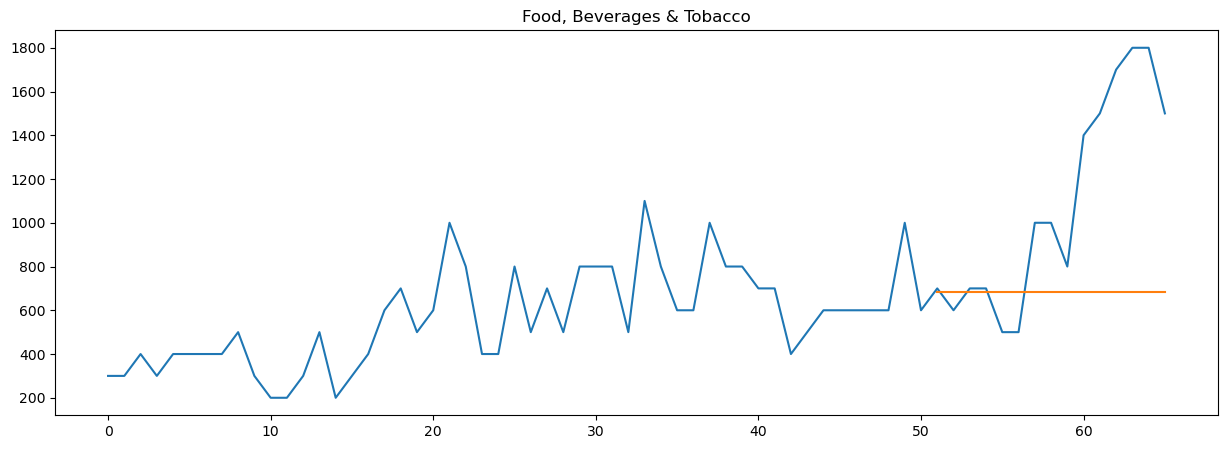

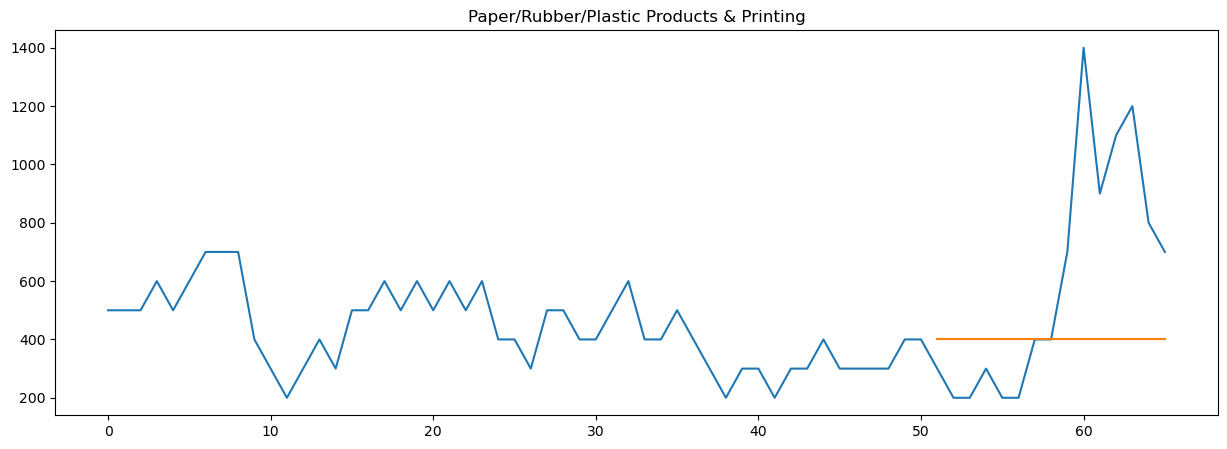

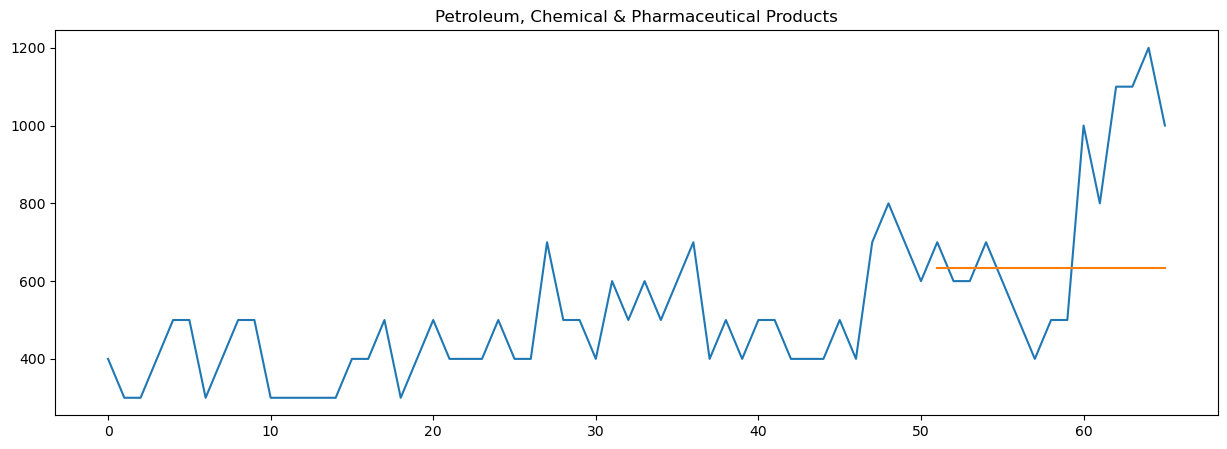

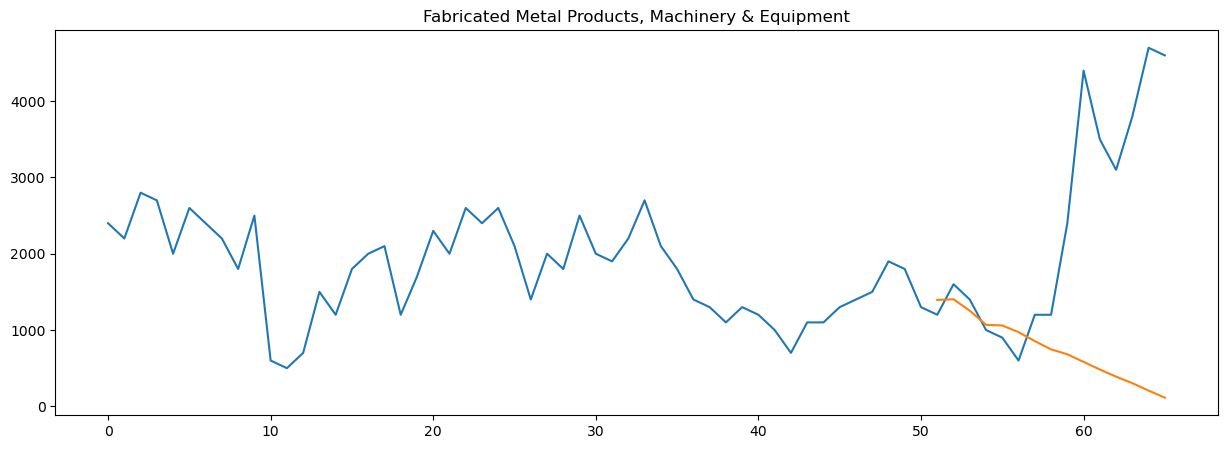

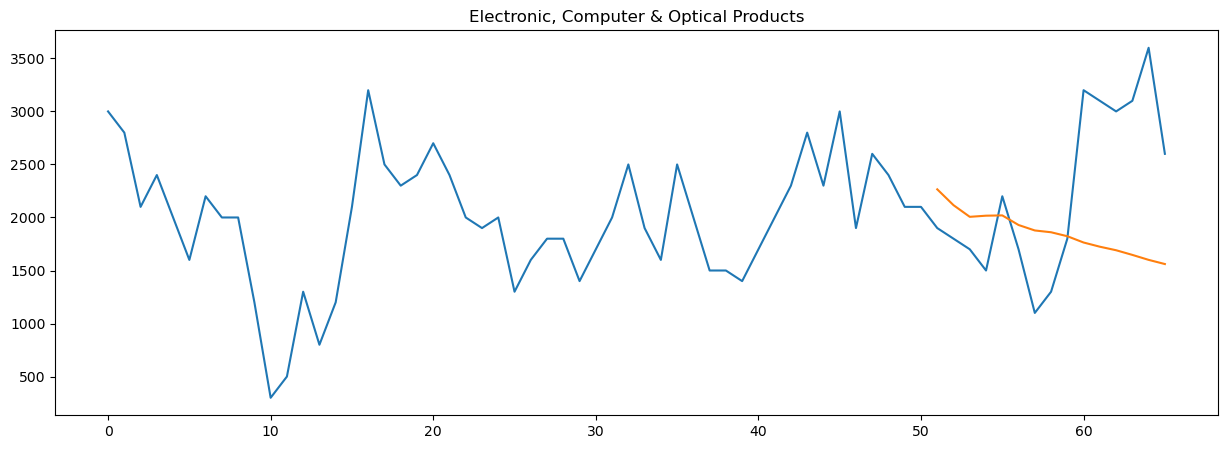

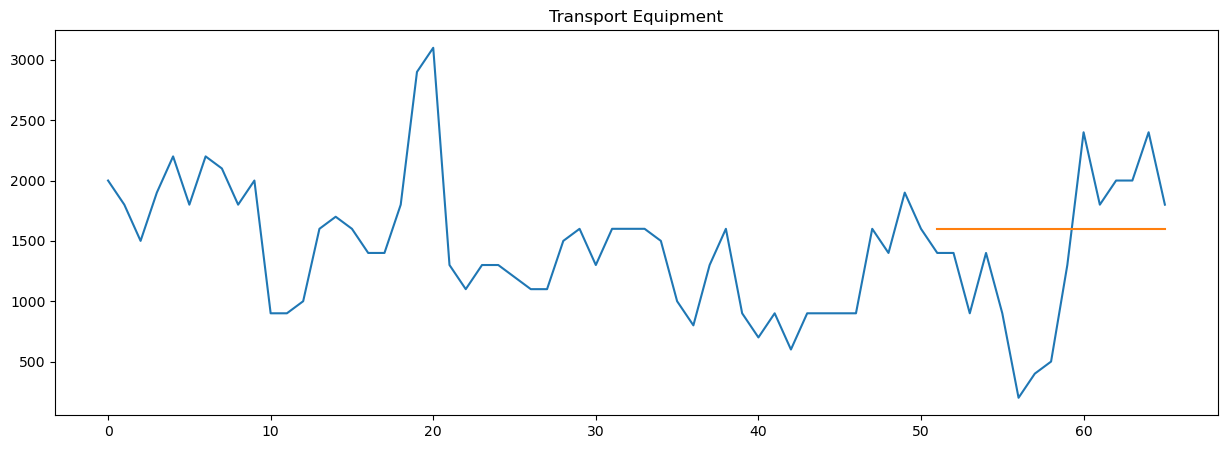

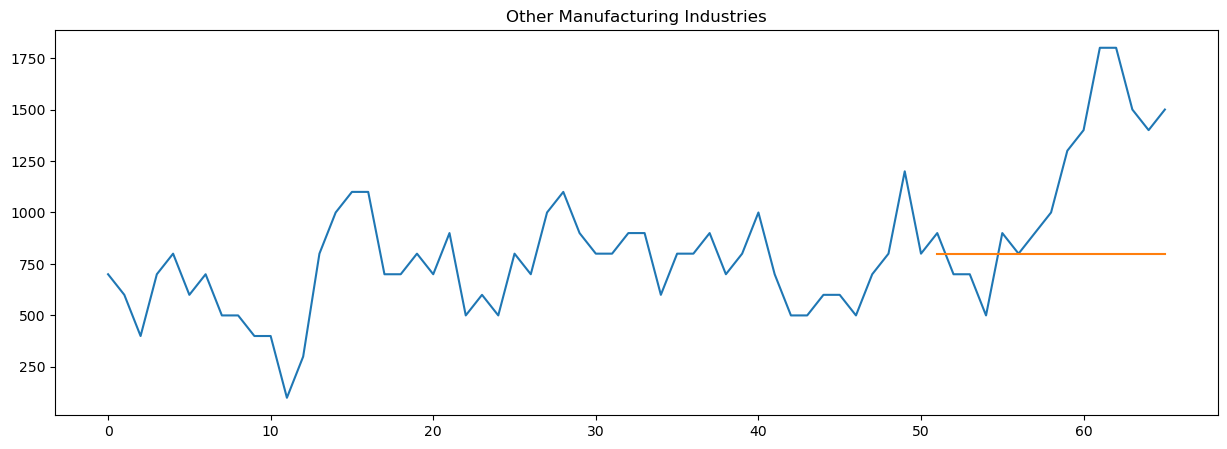

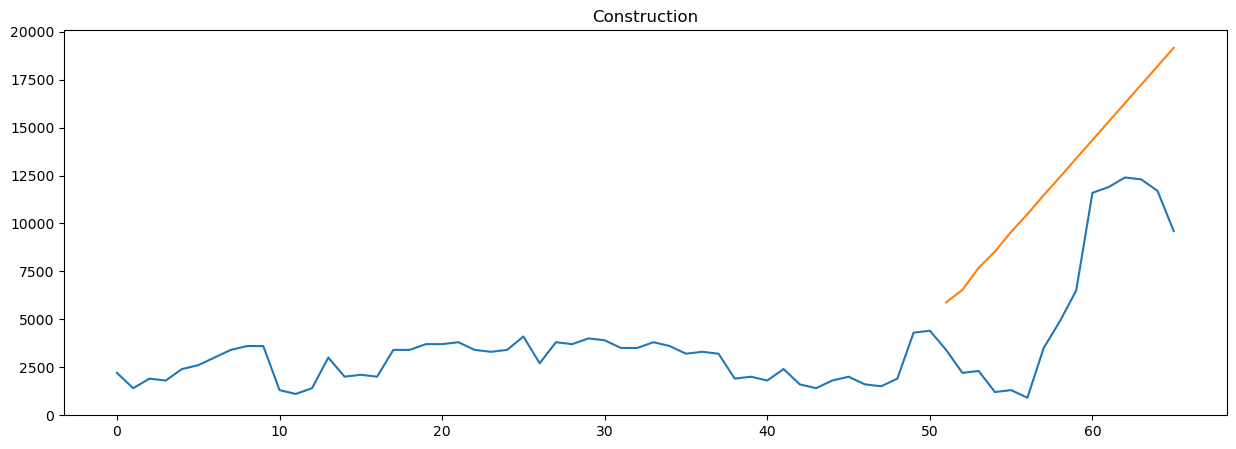

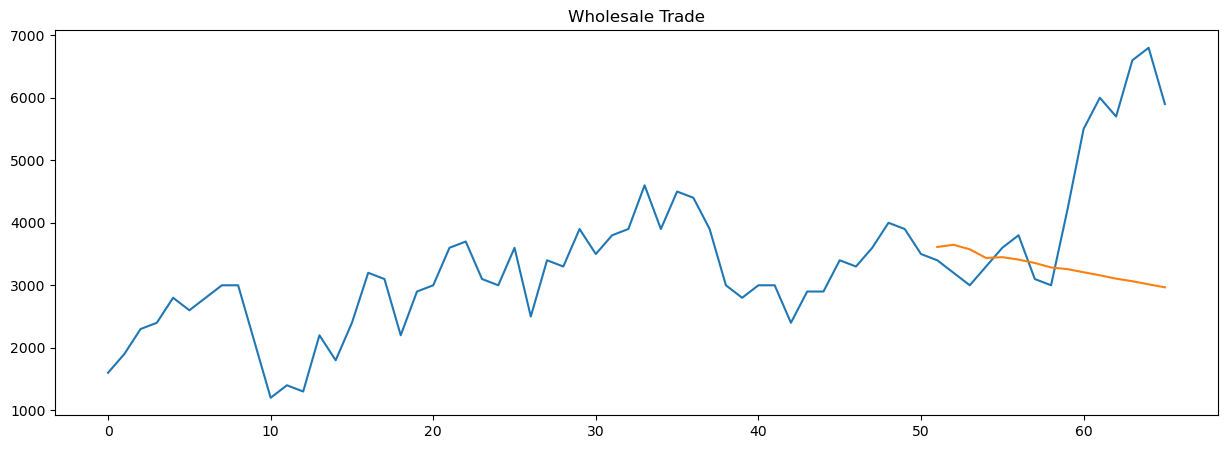

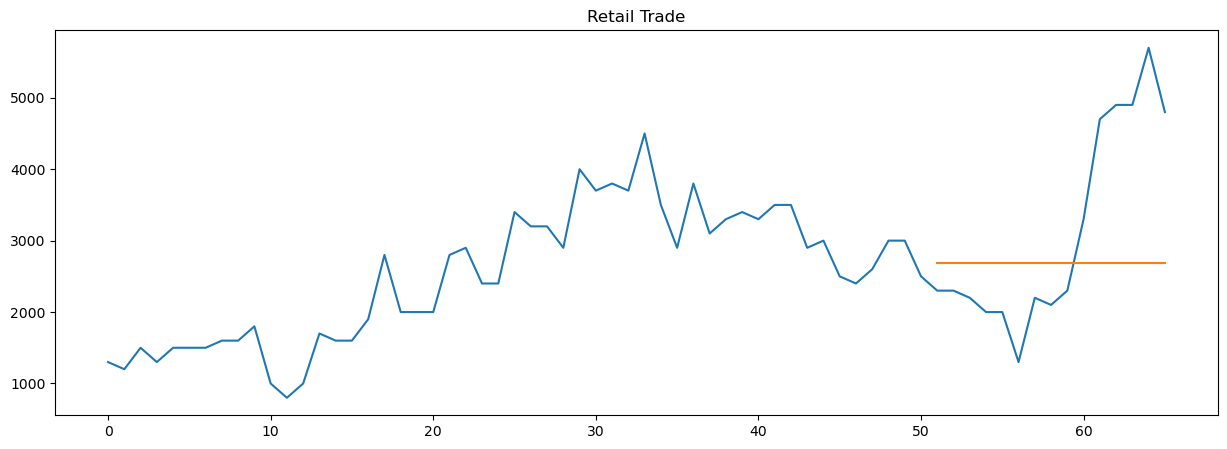

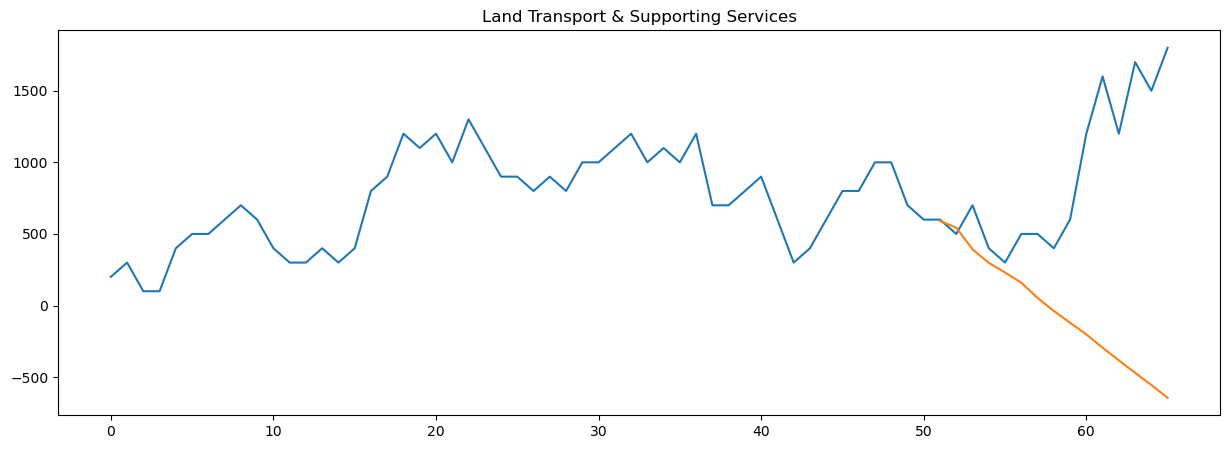

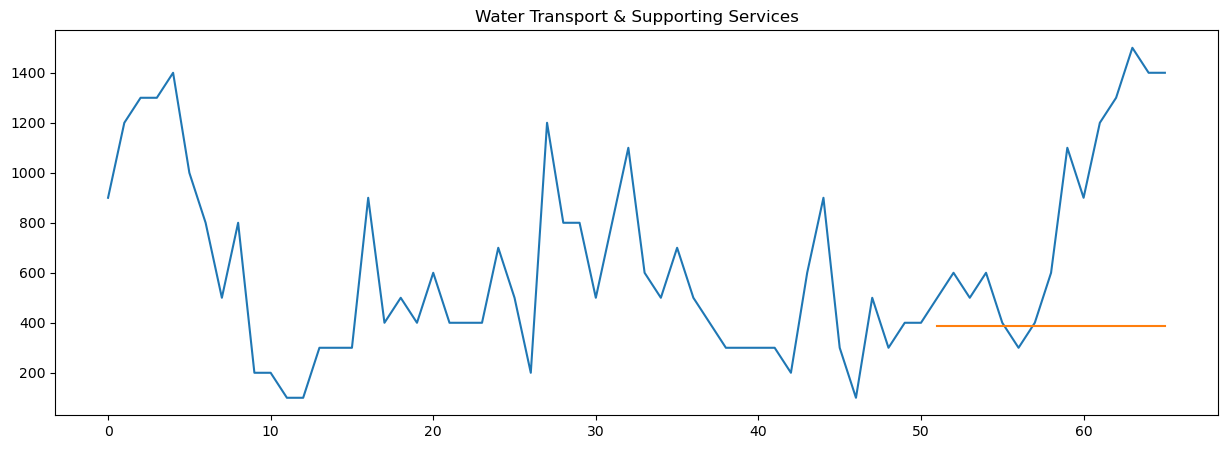

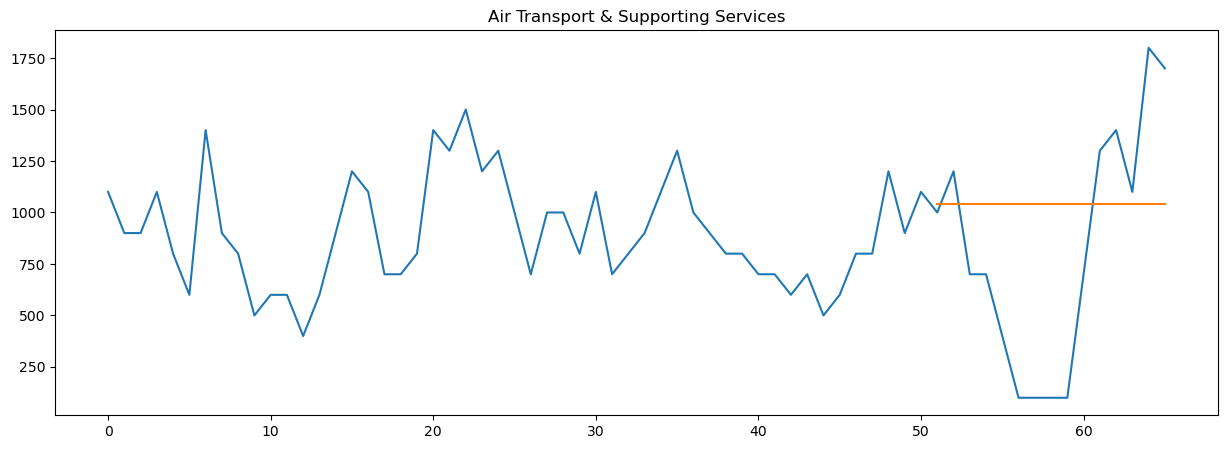

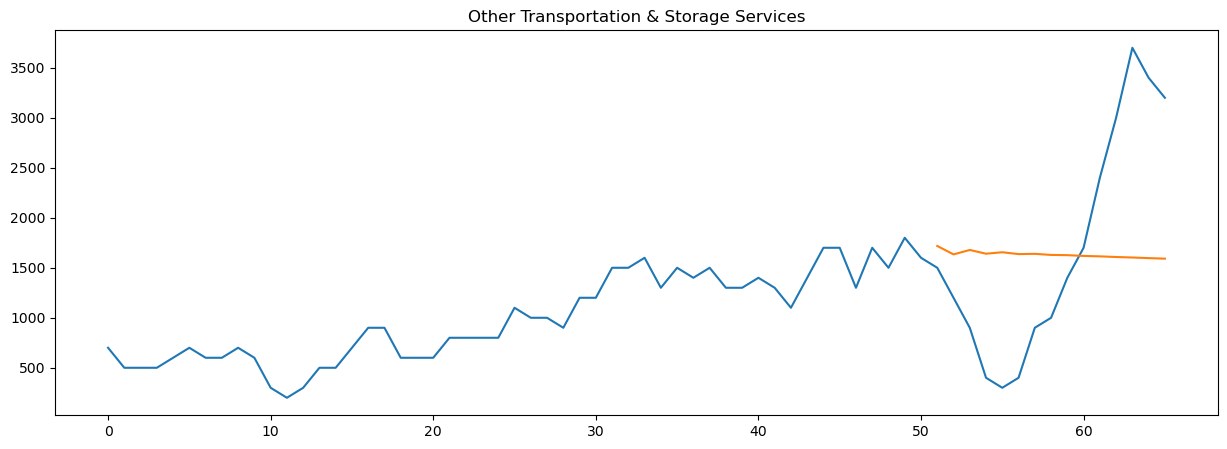

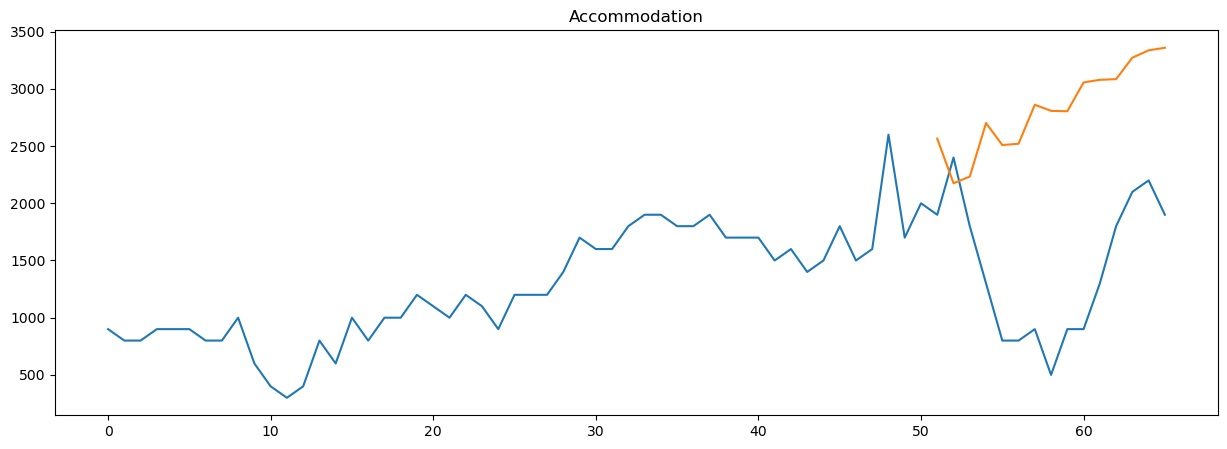

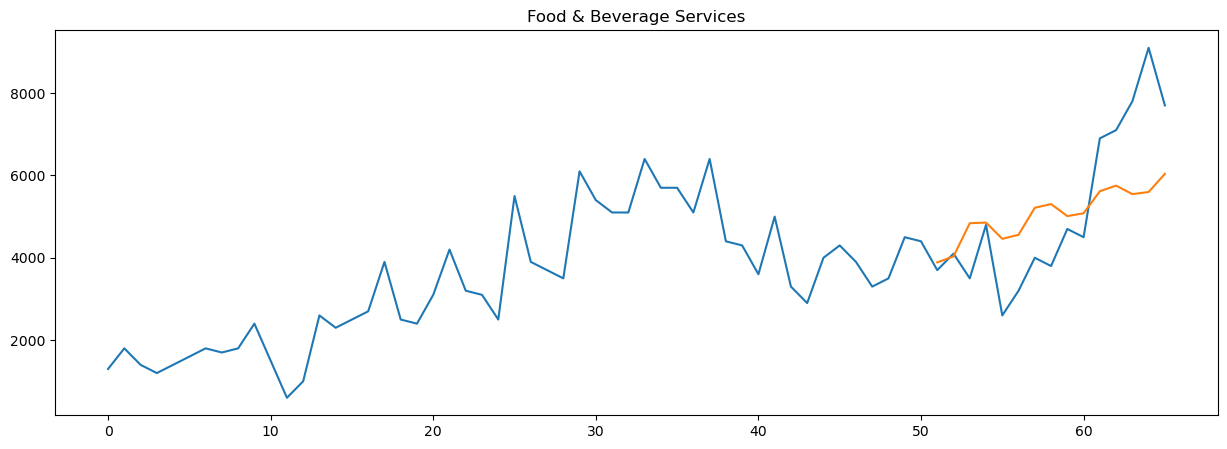

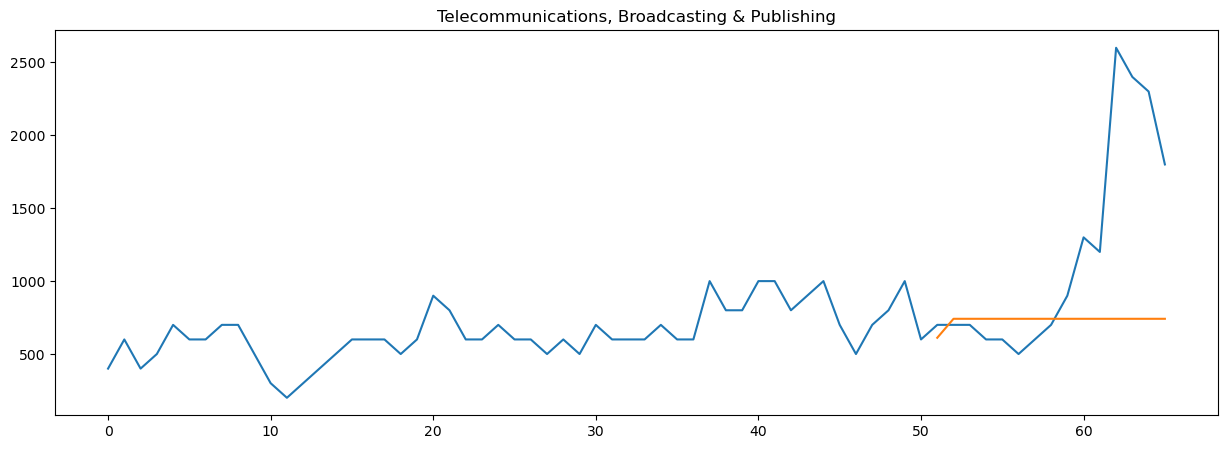

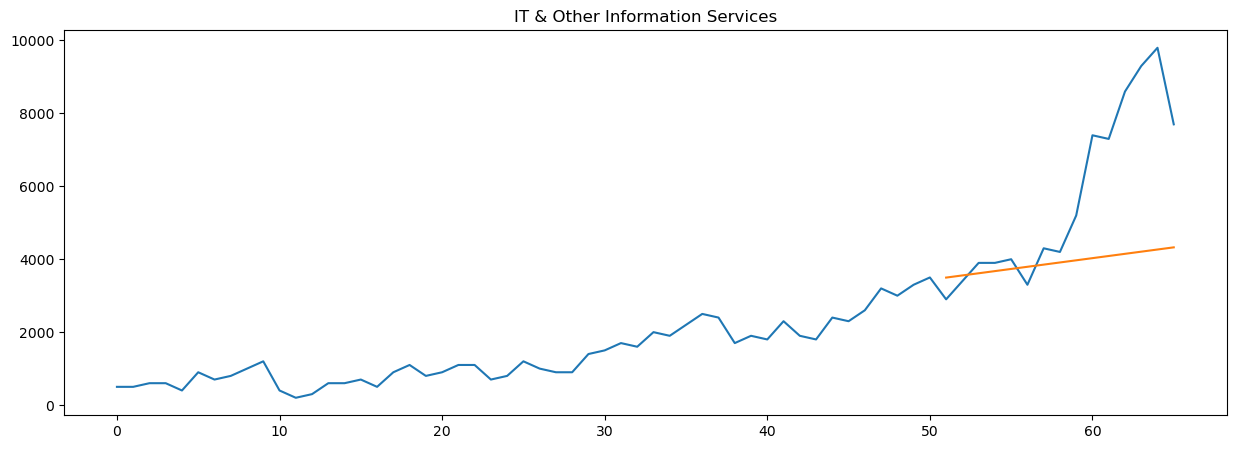

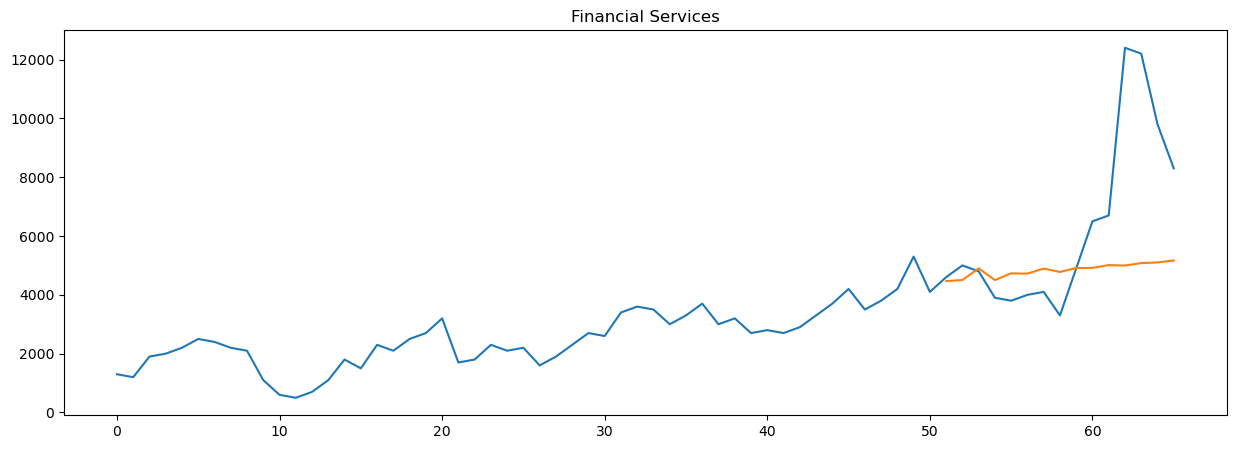

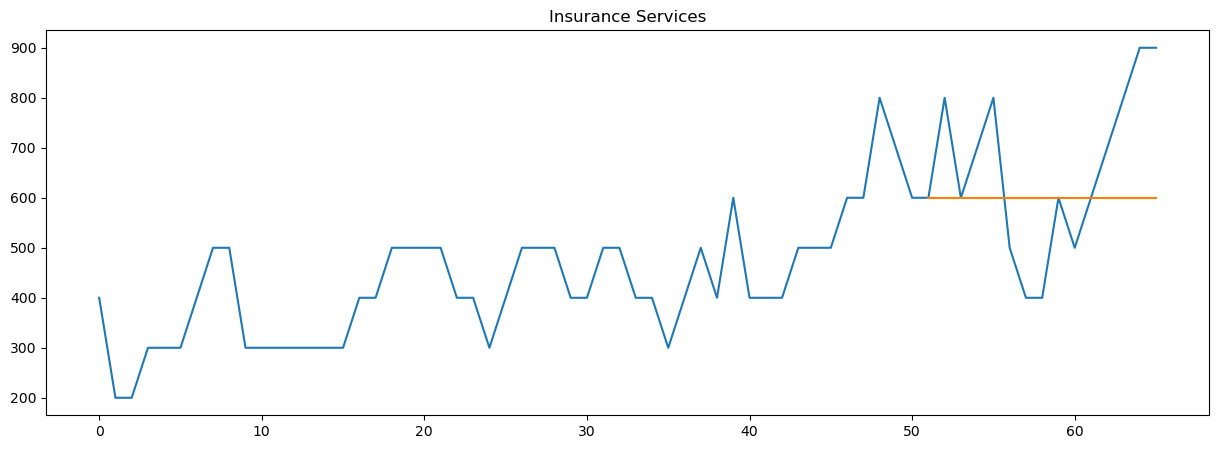

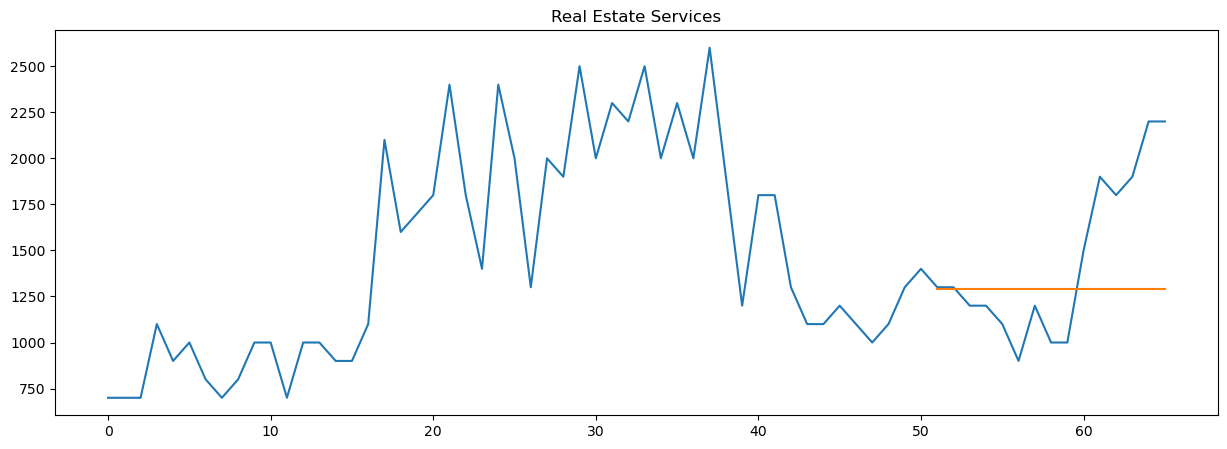

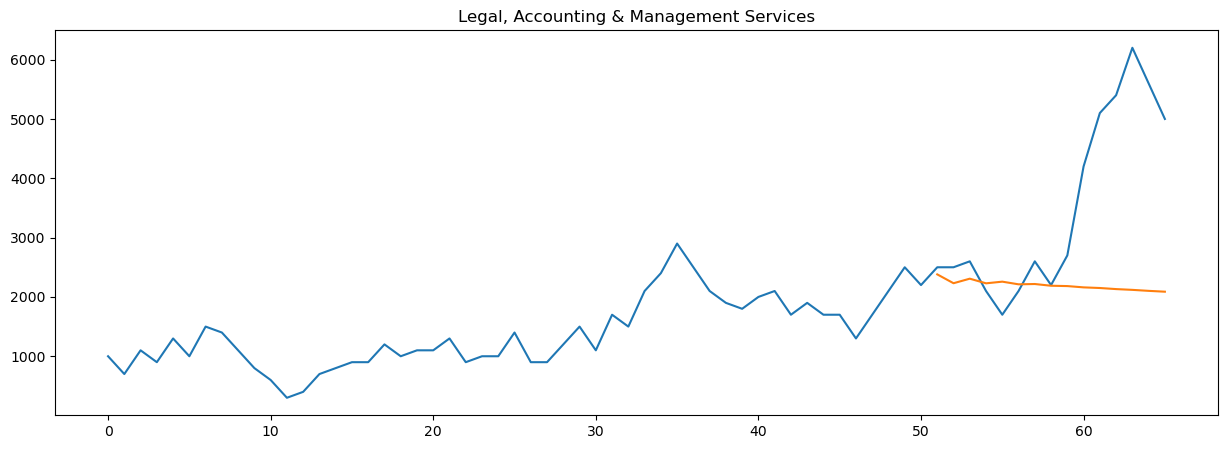

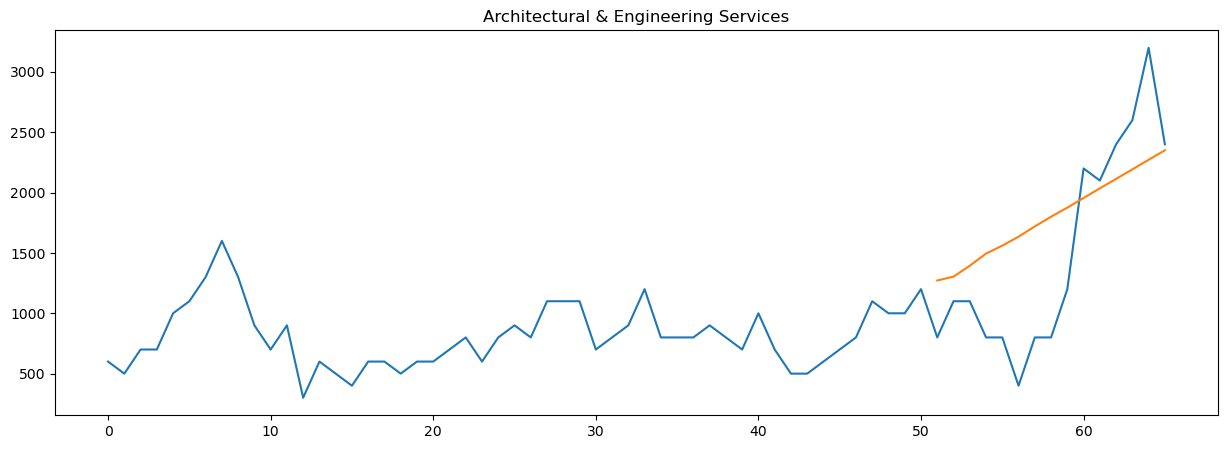

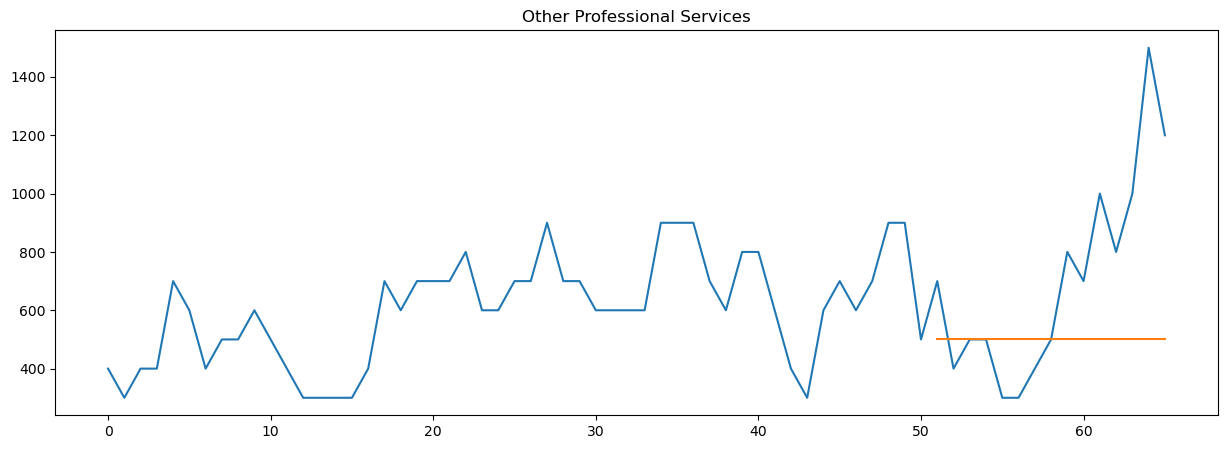

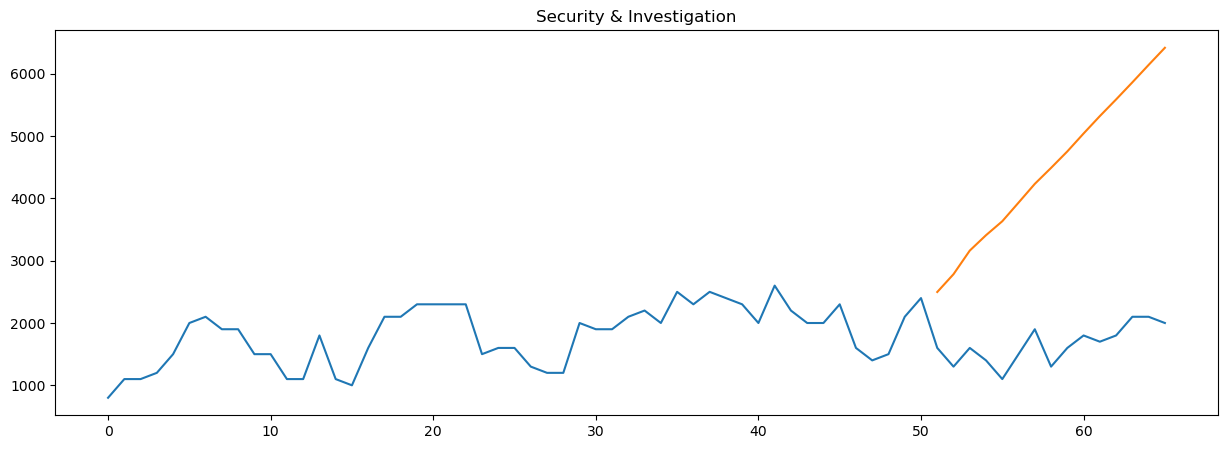

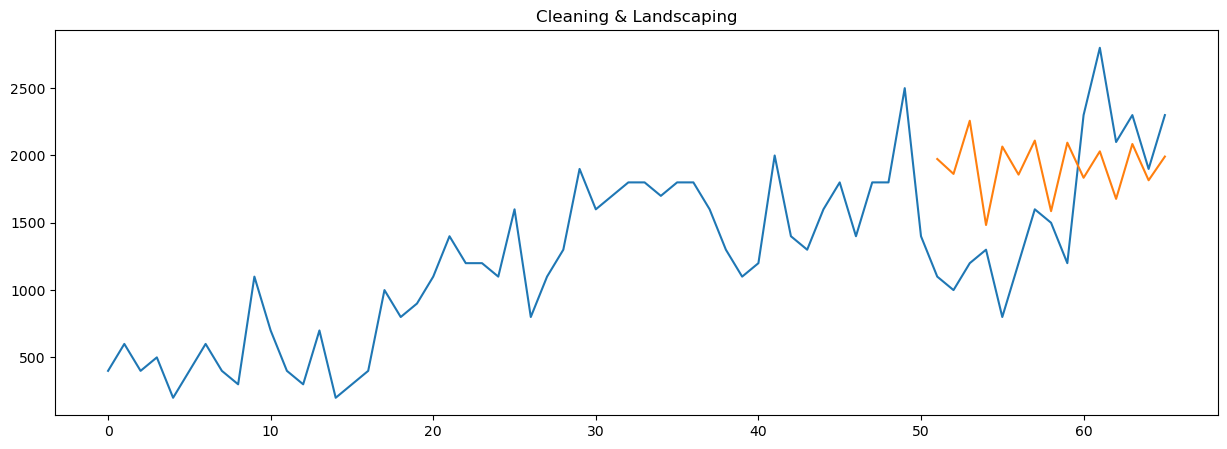

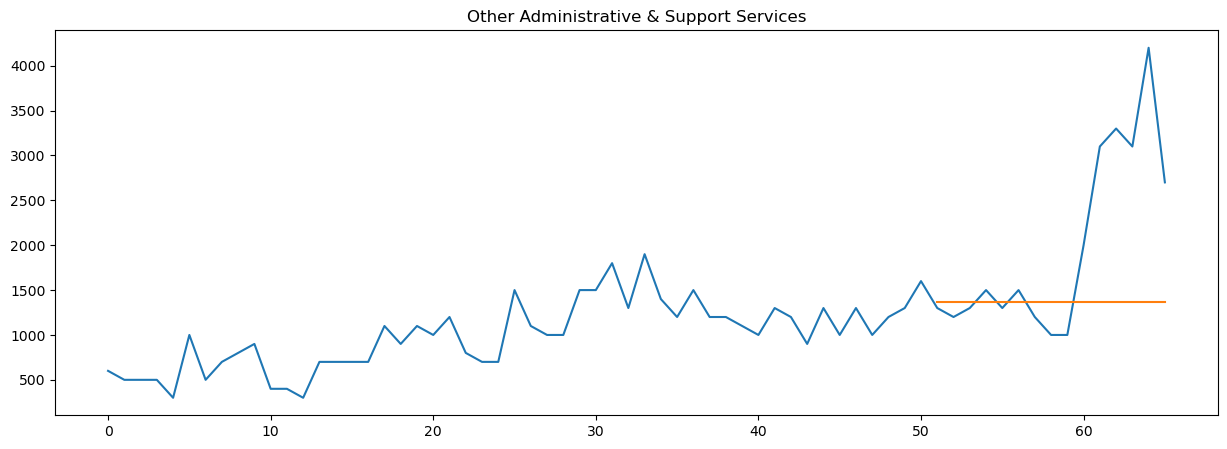

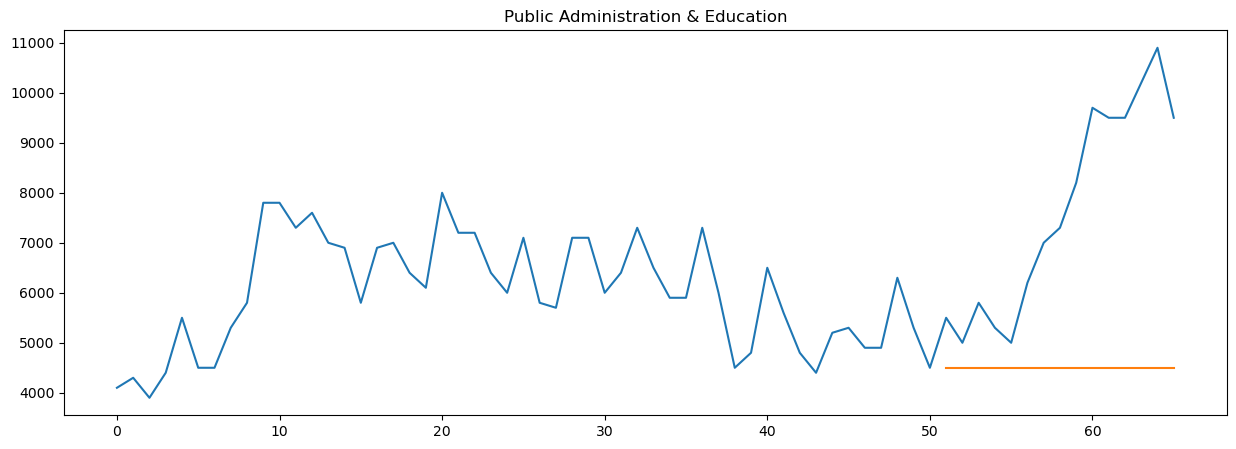

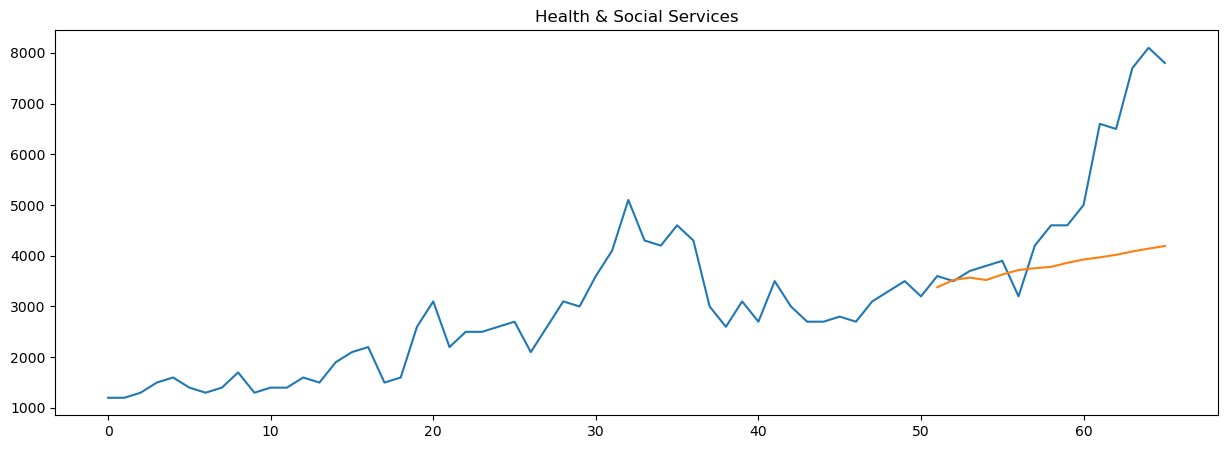

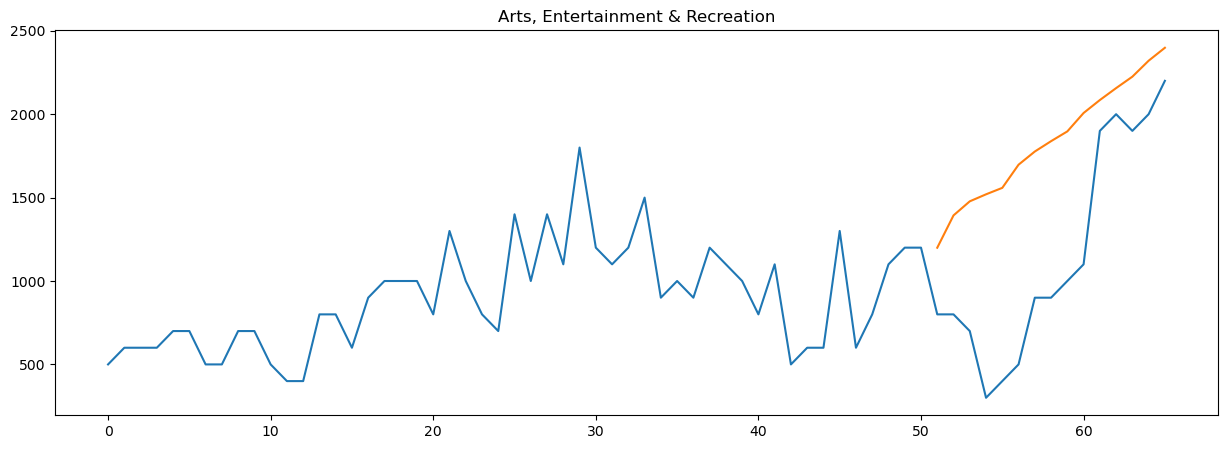

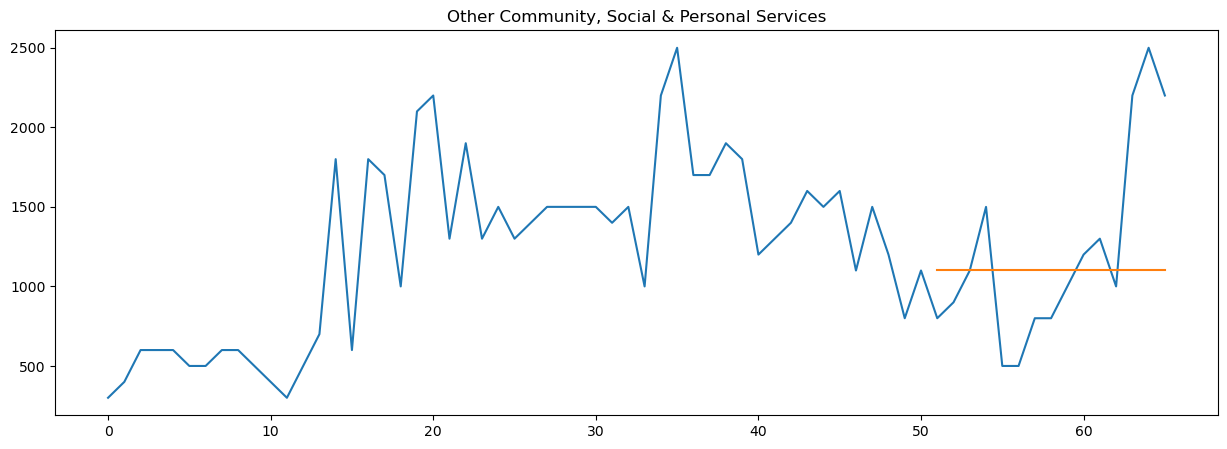

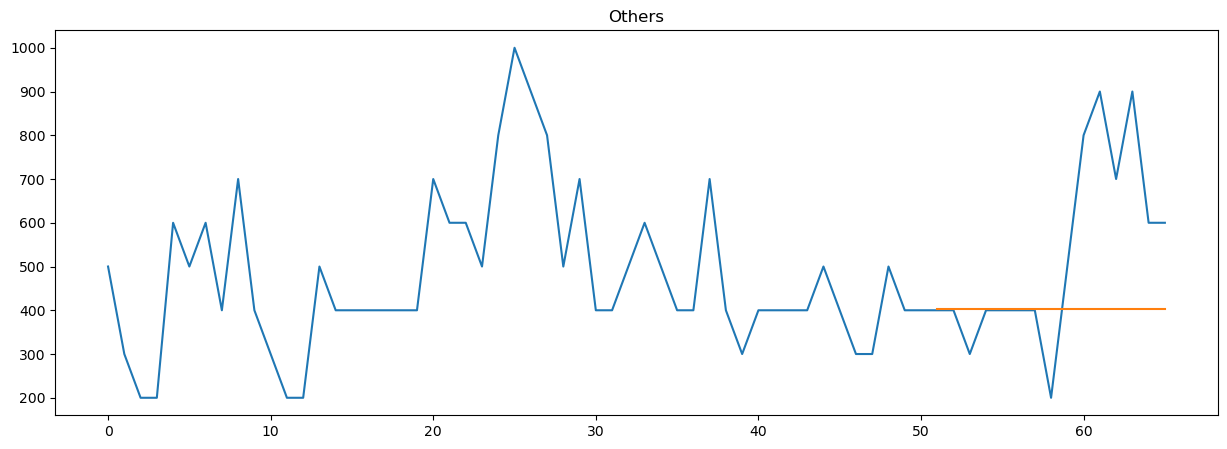

In [64]:
for col in Y.columns:
    if col == 'Time':
        continue
    
    prediction, confint = modelDict[col].predict(n_periods=TEST_SIZE, return_conf_int=True)
    cf= pd.DataFrame(confint)
    
    prediction_series = pd.Series(prediction,index=test.index)
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.set_title(col)
    ax.plot(Y[col])
    ax.plot(prediction_series)
    #ax.fill_between(prediction_series.index,
    #                cf[0],
    #                cf[1],color='grey',alpha=.3)

### Auto ARIMA models do not work very well, try using external variables to improve predictions

In [108]:
modelExoDict = {}

for col in Y.columns:
    if col == 'Time':
        continue
        
    print(f"Fitting Auto Arima to {col}")
    tempY = Y[col]

    train, test = tempY.iloc[:-TEST_SIZE], tempY.iloc[-TEST_SIZE:]

    model = auto_arima(train, start_p=1, start_q=1,
                       exogenous=X.iloc[:-TEST_SIZE],
                          trace=True,
                          error_action='ignore',  
                          suppress_warnings=True)
    
    modelExoDict[col] = model
    print('----------------------------------------------------------')
    print()

Fitting Auto Arima to Food, Beverages & Tobacco
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=668.330, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=683.751, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=677.630, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=666.830, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=681.789, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=668.239, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=669.121, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=665.971, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=667.736, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=667.643, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=675.801, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=669.920, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.386 seconds
----------------------------------------------------

 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=721.306, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=742.215, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=721.311, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=729.218, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=808.789, Time=0.00 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=723.504, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=723.274, Time=0.06 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=726.942, Time=0.04 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=721.753, Time=0.02 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=724.361, Time=0.02 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.340 seconds
----------------------------------------------------------

Fitting Auto Arima to Air Transport & Supporting Services
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=704.421, 

 ARIMA(1,1,2)(0,0,0)[0]             : AIC=734.214, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.262 seconds
----------------------------------------------------------

Fitting Auto Arima to Legal, Accounting & Management Services
Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=714.068, Time=0.04 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=719.407, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=718.992, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=719.489, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=717.707, Time=0.00 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=715.375, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=714.861, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=721.043, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=719.509, Time=0.01 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=712.6

 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=746.676, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=760.308, Time=0.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=748.011, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=749.910, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=745.076, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=746.639, Time=0.02 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=746.261, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=750.110, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=748.133, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.299 seconds
----------------------------------------------------------

Fitting Auto Arima to Others
Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=660.191, Time=0.01 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=674.206, Time=0.00 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=658.281, Time=0.01 sec
 ARIMA(0,0,

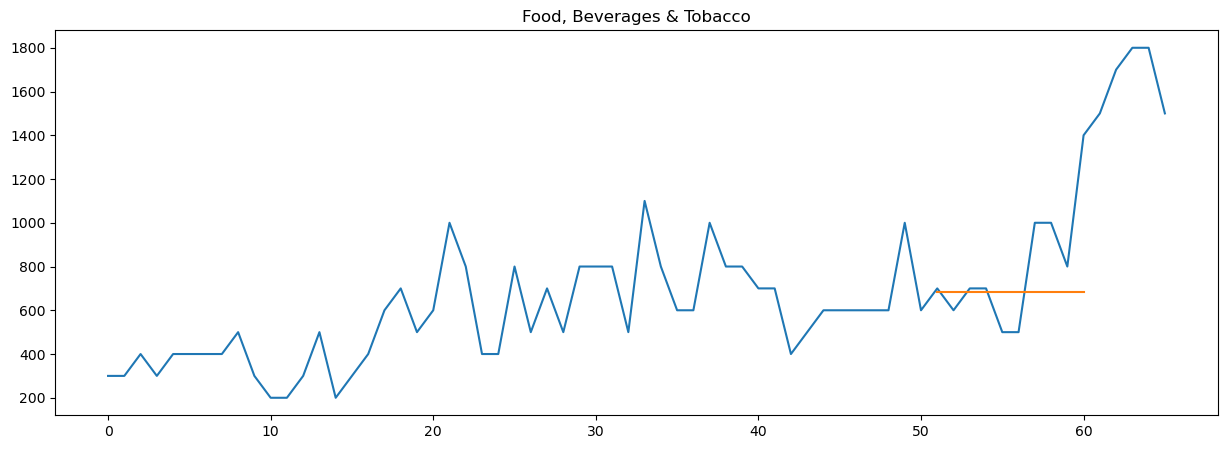

In [109]:
for col in Y.columns[0:2]:
    if col == 'Time':
        continue
    
    prediction = modelExoDict[col].predict(dynamic=True, exogenous=X)
    cf= pd.DataFrame(confint)
    
    prediction_series = pd.Series(prediction)
    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.set_title(col)
    ax.plot(Y[col])
    ax.plot(prediction)

In [107]:
prediction = modelExoDict['Food, Beverages & Tobacco'].predict(dynamic=True, exogenous=X)
prediction

51    682.721459
52    682.721459
53    682.721459
54    682.721459
55    682.721459
56    682.721459
57    682.721459
58    682.721459
59    682.721459
60    682.721459
dtype: float64

## VECM

In [77]:
model = VECM(Y, deterministic="ci", seasons=4,
             diff_lags=lag_order.aic,  # =3
             coint_rank=rank_test.rank)  # =1

NameError: name 'lag_order' is not defined